<a href="https://colab.research.google.com/github/MerveKaragulTabas/ML-Machine-Learning-/blob/main/ML_Session_2_(Multiple_Linear_Regression_and_Regression_Error_Metrics).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multiple Linear Regression and Regression Error Metrics

## Import library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')

## Read Dataset

In [ ]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Data Preparation

In [ ]:
df.shape

(200, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
print(np.mean([100, 110, 120, 115]))
print(np.std([100, 110, 120, 115]))

111.25
7.39509972887452


In [ ]:
print(np.mean([100, 110, 120, 700]))
print(np.std([100, 110, 120, 700]))

257.5
255.57533136044253


In [ ]:
print(np.mean([100, 110, 120, 900]))
print(np.std([100, 110, 120, 900]))

307.5
342.153109002388


## Distribution of features

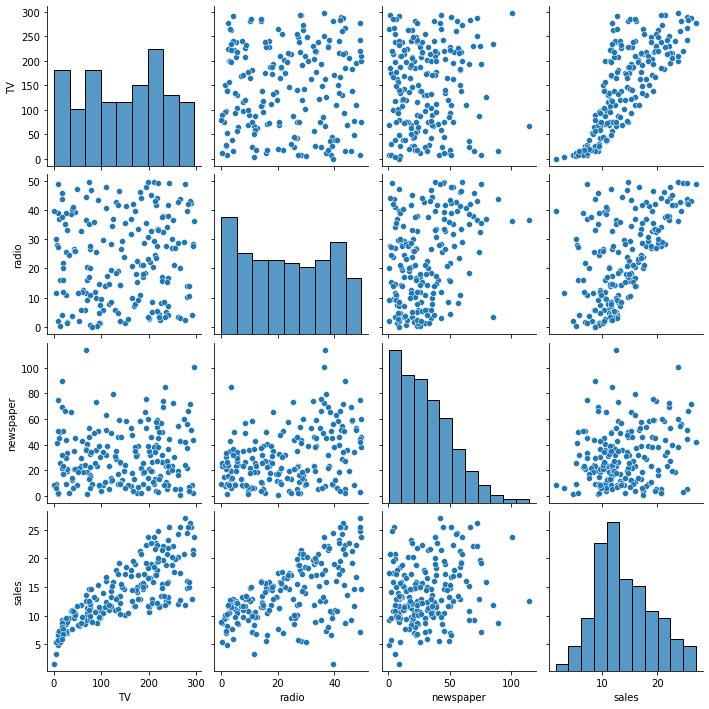

In [ ]:
sns.pairplot(df);

In [ ]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


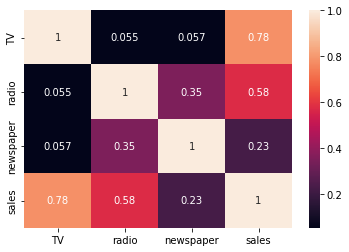

In [ ]:
sns.heatmap(df.corr(), annot = True)

## Train-Test Split

In [ ]:
pip install scikit-learn

In [ ]:
X = df.drop(columns ="sales") #df[["TV", "radio", "newspaper"]]
y = df["sales"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

In [ ]:
df.sample(15)

,TV,radio,newspaper,sales
184,253.8,21.3,30.0,17.6
61,261.3,42.7,54.7,24.2
91,28.6,1.5,33.0,7.3
177,170.2,7.8,35.2,11.7
84,213.5,43.0,33.8,21.7
72,26.8,33.0,19.3,8.8
165,234.5,3.4,84.8,11.9
14,204.1,32.9,46.0,19.0
22,13.2,15.9,49.6,5.6
67,139.3,14.5,10.2,13.4


In [ ]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (140, 3)
Train target shape   :  (140,)
Test features shape  :  (60, 3)
Test target shape    :  (60,)


In [ ]:
X_train

,TV,radio,newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [ ]:
X_test

,TV,radio,newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
115,75.1,35.0,52.7
69,216.8,43.9,27.2
170,50.0,11.6,18.4
174,222.4,3.4,13.1
45,175.1,22.5,31.5


In [ ]:
y_train

169    15.0
97     15.5
31     11.9
12      9.2
35     12.8
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: sales, Length: 140, dtype: float64

## Model Fitting and Compare Actual and Predicted Labels

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [ ]:
model.coef_

array([0.04405928, 0.1992875 , 0.00688245])

In [ ]:
model.intercept_

2.7089490925159048

In [ ]:
# y_pred = b3 * TV + b2 * radio + b3 * newspaper + b0

In [ ]:
sum(X_test.loc[95] * model.coef_) + model.intercept_

16.565396297434837

In [ ]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred}

In [ ]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,Pred,Residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


In [ ]:
result_sample = comparing.head(25)
result_sample

,Actual,Pred,Residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


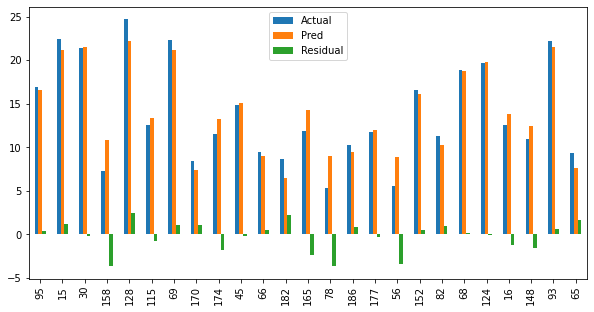

In [ ]:
result_sample.plot(kind ="bar", figsize=(10,5))
plt.show()

## Error Metrics

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
R2_score = r2_score(y_test, y_pred)
R2_score

0.8609466508230368

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mae

1.5116692224549086

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse

3.796797236715219

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

1.9485372043446385

In [ ]:
sales_mean = df["sales"].mean()
sales_mean

14.022500000000003

In [ ]:
mae / sales_mean

0.10780311802138766

In [ ]:
rmse / sales_mean

0.13895790367941793

## Adjusted R2 score 

In [ ]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = df.shape[0]   # number of observations
    p = df.shape[1]-1 # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [ ]:
adj_r2(y_test, y_pred, df)

0.8588182832335934

## What is the concept of punishment for RMSE error metric?

In [ ]:
variables = {"Actual": [1000, 2000, 3000, 4000, 5000], "pred": [1100, 2200, 3200, 4200, 5300]}

In [ ]:
df_2 = pd.DataFrame(variables)
df_2

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3200
3,4000,4200
4,5000,5300


In [ ]:
df_2["residual"] = abs(df_2.Actual - df_2.pred)

In [ ]:
df_2

,Actual,pred,residual
0,1000,1100,100
1,2000,2200,200
2,3000,3200,200
3,4000,4200,200
4,5000,5300,300


In [ ]:
#mae
df_2.residual.sum()/5 #200

200.0

In [ ]:
#rmse
((df_2.residual**2).sum()/5)**0.5 #209.76

209.76176963403032

## Evaluation Model

In [ ]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [ ]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8609466508230368
MAE 		: 1.5116692224549086
MSE 		: 3.796797236715219
RMSE 		: 1.9485372043446385


In [ ]:
y_train_pred = model.predict(X_train)

In [ ]:
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9055159502227753
MAE 		: 1.1581502948072526
MSE 		: 2.4793551789057866
RMSE 		: 1.574596830590544


## Is data suitable for linear regression?

https://stats.stackexchange.com/questions/12262/what-if-residuals-are-normally-distributed-but-y-is-not

## Plotting residuals

In [ ]:
residuals = y_test-y_pred

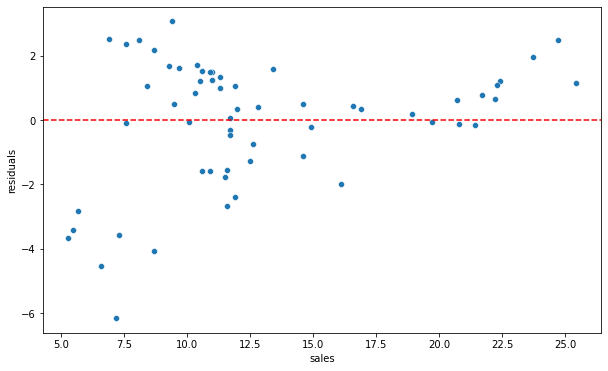

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

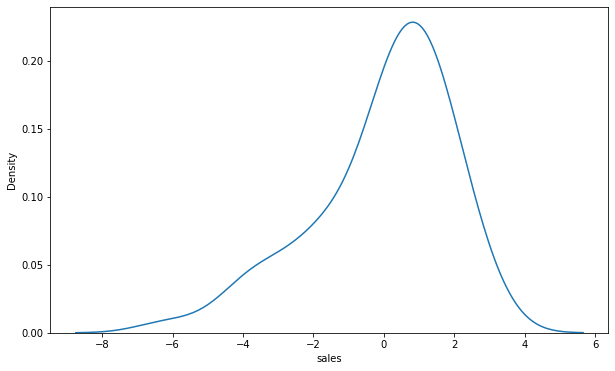

In [ ]:
sns.kdeplot(residuals)

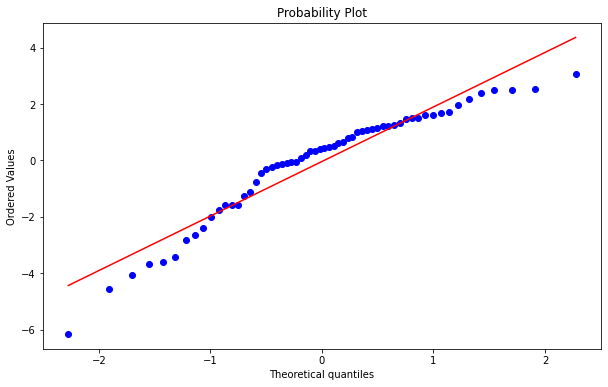

In [ ]:
stats.probplot(residuals, dist ="norm", plot =plt);

In [ ]:
from scipy.stats import skew
skew(residuals)

-0.9865673346742719

In [ ]:
#pip install yellowbrick

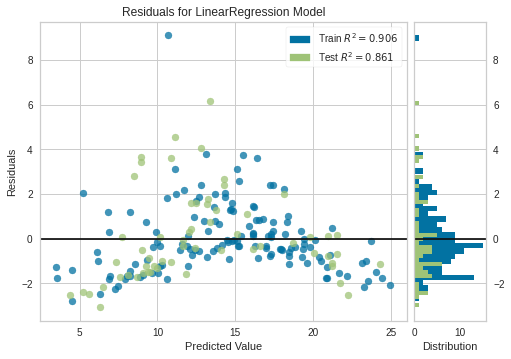

In [ ]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();        # Finalize and render the figure

## Prediction Error for LinearRegression

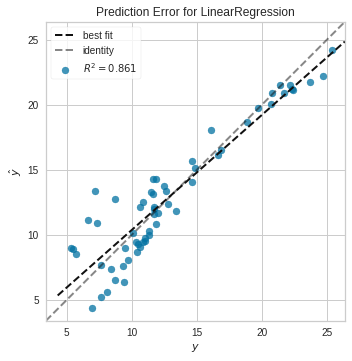

In [ ]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();    

## Retraining Model on Full Data

In [ ]:
final_model = LinearRegression()

In [ ]:
final_model.fit(X, y)

LinearRegression()

## Coefficients

In [ ]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [ ]:
final_model.intercept_

2.938889369459412

In [ ]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
coeff_df = pd.DataFrame(final_model.coef_, index = X.columns, columns = ["Coefficient"] )

In [ ]:
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


## Prediction on New Data

In [ ]:
adv = [[150, 20, 15]]

In [ ]:
adv

[[150, 20, 15]]

In [ ]:
final_model.predict(adv)

array([13.55862413])

In [ ]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [ ]:
final_model.intercept_

2.938889369459412

In [ ]:
sum(final_model.coef_ * [150, 20, 15]) + final_model.intercept_

13.558624130495996

In [ ]:
adv_2 = [[150, 20, 15], [160, 20, 15]]

In [ ]:
final_model.predict(adv_2)

array([13.55862413, 14.01627059])

In [ ]:
14.01627059 - 13.55862413

0.4576464599999994

## The effect of features on the predicted label

In [ ]:
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


In [ ]:
coeff_df.Coefficient * adv[0]

TV           6.864697
radio        3.770600
newspaper   -0.015562
Name: Coefficient, dtype: float64

In [ ]:
6.864697 / 13.55862413

0.5062974630892729

In [ ]:
3.770600 / 13.55862413

0.2780960637191142

In [ ]:
-0.015562 / 13.55862413

-0.0011477565755043907